<h1> Factors Affecting Math Grades of Portugese Students </h1>
<br> In this notebook, I'll be using Bayesian Linear Regression to get more insight on the factors that could affect math grades in Portugese students. These insights should help us think of programs or policies that aim to improve math grades for students that are being left behind. Let's go!
<br>
<h2> Objectives </h2> <br>
The main goal of this study is <b>not necessarily prediction</b>. Just like most things in the social science realm, we want to <b>better understand human behavior</b> that should lead us to create programs and policies to improve the human condition. So, given this, these are the main objectives of this study:
<ul>
    <li> Identify factors or variables that can affect Math grades in Portugese students </li>
    <li> Come up with insights from the results </li>
    <li> Suggest and design programs based on those insights </li>
    </ul>
<h2> The Dataset </h2> <br>
The dataset we're using is a Kaggle dataset that can be found <a href = 'https://www.kaggle.com/yamqwe/student-performance?select=student.txt'> HERE </a>. It has 

In [1]:
import os
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import arviz as az


#Load Data
df_math = pd.read_csv('student-mat.csv')

In [2]:
df_math = df_math.dropna()
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#Formatting data and one-hot encoding
df_school = pd.get_dummies(df_math.school, prefix = 'school', drop_first = True)
df_sex = pd.get_dummies(df_math.sex, prefix = 'sex', drop_first = True)
df_address = pd.get_dummies(df_math.address, prefix = 'address', drop_first = True)
df_famsize = pd.get_dummies(df_math.famsize, prefix = 'fam', drop_first = True)
df_pstatus = pd.get_dummies(df_math.Pstatus, prefix = 'pstatus', drop_first = True)
df_mjob = pd.get_dummies(df_math.Mjob, prefix = 'Mjob')
df_fjob = pd.get_dummies(df_math.Fjob, prefix = 'Fjob')
df_schoolsup = pd.get_dummies(df_math.schoolsup, prefix = 'schoolsup', drop_first = True)
df_famsup = pd.get_dummies(df_math.famsup, prefix = 'famsup', drop_first = True)
df_paid = pd.get_dummies(df_math.paid, prefix = 'paid', drop_first = True)
df_nursery = pd.get_dummies(df_math.nursery, prefix = 'nursery', drop_first = True)
df_higher = pd.get_dummies(df_math.higher, prefix = 'higher', drop_first = True)
df_activities = pd.get_dummies(df_math.activities, prefix = 'activities', drop_first = True)
df_internet= pd.get_dummies(df_math.activities, prefix = 'internet', drop_first = True)

In [4]:
df_math = df_math[['school', 'age', 'Medu', 'Fedu', 'studytime', 'absences', 'G1', 'G2', 'G3', 'health']]
df_joined = pd.concat([df_math, df_sex, df_school, df_address, df_famsize, df_pstatus, df_mjob, df_fjob
          , df_schoolsup, df_famsup, df_paid, df_nursery, df_higher, df_activities, df_internet], axis = 1)
df_joined

,school,age,Medu,Fedu,studytime,absences,G1,G2,G3,health,...,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,paid_yes,nursery_yes,higher_yes,activities_yes,internet_yes
0,GP,18,4,4,2,6,5,6,6,3,...,0,0,1,1,0,0,1,1,0,0
1,GP,17,1,1,2,4,5,5,6,3,...,1,0,0,0,1,0,0,1,0,0
2,GP,15,1,1,2,10,7,8,10,3,...,1,0,0,1,0,1,1,1,0,0
3,GP,15,4,2,3,2,15,14,15,5,...,0,1,0,0,1,1,1,1,1,1
4,GP,16,3,3,2,4,6,10,10,5,...,1,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,20,2,2,2,11,9,9,9,4,...,0,1,0,0,1,1,1,1,0,0
391,MS,17,3,1,1,3,14,16,16,2,...,0,1,0,0,0,0,0,1,0,0
392,MS,21,1,1,1,3,10,8,7,3,...,1,0,0,0,0,0,0,1,0,0
393,MS,18,3,2,1,0,11,12,10,5,...,1,0,0,0,0,0,0,1,0,0


<h2> Data Exploration & Correlations</h2>
<br>
<b> Data story </b>
<ul>
    <li> What does the sample look like? is the data balanced? </li>
    </ul>
    
<b> Which groups perform better? </b>
<ul>
    <li> Rural vs. Urban </li>
    <li> With paid support vs. without </li>
    

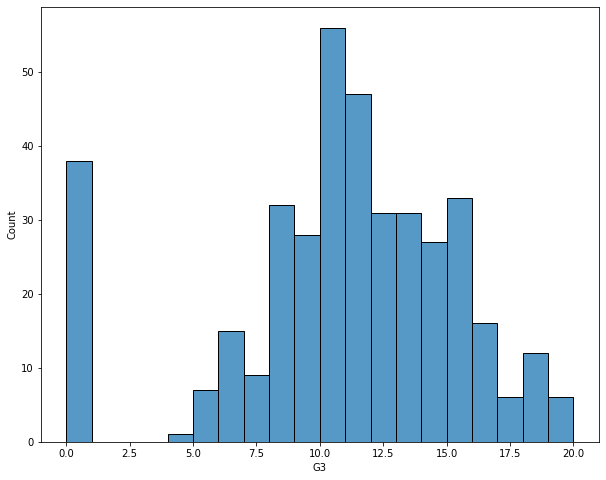

In [6]:
plt.figure(figsize=(10,8))
sns.histplot(df_joined['G3'], bins = 20)
plt.show()

In [38]:
df_joined_corr = df_joined[['G3', 'address_U', 'studytime', 'schoolsup_yes', 'famsup_yes', 'paid_yes'\
                           , 'internet_yes', 'activities_yes', 'higher_yes', 'health', 'absences']]
df_joined_corr.corr()


,G3,address_U,studytime,schoolsup_yes,famsup_yes,paid_yes,internet_yes,activities_yes,higher_yes,health,absences
G3,1.000000,0.105756,0.097820,-0.082788,-0.039157,0.101996,0.016100,0.016100,0.182465,-0.061335,0.034247
address_U,0.105756,1.000000,-0.020912,0.024712,0.023903,0.052800,-0.051360,-0.051360,0.042854,-0.040355,-0.027874
studytime,0.097820,-0.020912,1.000000,0.037763,0.145228,0.167220,0.089877,0.089877,0.175081,-0.075616,-0.062700
schoolsup_yes,-0.082788,0.024712,0.037763,1.000000,0.104681,-0.020753,0.046032,0.046032,0.054486,-0.034124,0.022526
famsup_yes,-0.039157,0.023903,0.145228,0.104681,1.000000,0.293184,-0.001500,-0.001500,0.100815,0.029297,0.024353
paid_yes,0.101996,0.052800,0.167220,-0.020753,0.293184,1.000000,-0.021382,-0.021382,0.189214,-0.078132,0.007435
internet_yes,0.016100,-0.051360,0.089877,0.046032,-0.001500,-0.021382,1.000000,1.000000,0.096484,0.023923,-0.013610
activities_yes,0.016100,-0.051360,0.089877,0.046032,-0.001500,-0.021382,1.000000,1.000000,0.096484,0.023923,-0.013610
higher_yes,0.182465,0.042854,0.175081,0.054486,0.100815,0.189214,0.096484,0.096484,1.000000,-0.015895,-0.056085
health,-0.061335,-0.040355,-0.075616,-0.034124,0.029297,-0.078132,0.023923,0.023923,-0.015895,1.000000,-0.029937


<AxesSubplot:>

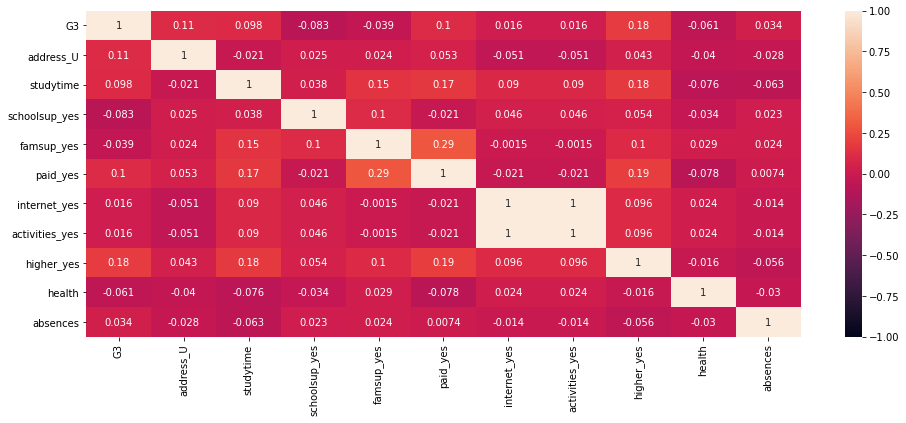

In [45]:
plt.figure(figsize=(16, 6))

sns.heatmap(df_joined_corr.corr(), vmin=-1, vmax=1, annot=True)

<h2> Bayesian GLM </h2>

In [36]:
with pm.Model() as performance_model:
#data
    address_x = pm.Data('address_x', df_joined['address_U'].values)
    studytime_x = pm.Data('studytime_x', df_joined['studytime'].values)
    schoolsup_x = pm.Data('schoolsup_x', df_joined['schoolsup_yes'].values)
    health_x = pm.Data('health_x', df_joined['health'].values)
    absences_x = pm.Data('absences_x', df_joined['absences'].values)
    paid_x = pm.Data('paid_x', df_joined['paid_yes'].values)
    famsup_x = pm.Data('famsup_x', df_joined['famsup_yes'].values)
    G3_x = pm.Data('G3', df_joined['G3'].values)
    higher_x = pm.Data('higher_x', df_joined['higher_yes'].values)
    internet_x = pm.Data('internet_x', df_joined['internet_yes'].values)
    
    #Priors
    alpha = pm.Normal('intercept', 0, 1)
    studytime = pm.HalfNormal('studytime', sd = 0.5)
    schoolsup = pm.HalfNormal('schoolsup', sd = 0.5)
    famsup = pm.HalfNormal('famsup', sd = 0.5)
    internet = pm.Normal('internet', 0, 1)
    paid = pm.HalfNormal('paid', sd = 0.5)
    health = pm.Normal('health', 0, 1)
    address = pm.Normal('address', 0, 1)
    higher = pm.Normal('higher', 0, 1)
    
    eps = pm.HalfCauchy('eps', 5)
    

     # expected val
    G3 = alpha + studytime * studytime_x + schoolsup * schoolsup_x + \
    famsup * famsup_x + paid * paid_x + address * address_x + higher * higher_x\
    + internet * internet_x + health * health_x 
    
    #Likelihood
    Y_obs = pm.TruncatedNormal('Y', mu = G3, sigma = eps, observed = G3_x, lower = 0, upper = 20)


In [37]:
with performance_model:
    trace = pm.sample(4000, tune = 2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, higher, address, health, paid, internet, famsup, schoolsup, studytime, intercept]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 64 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'internet'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'higher'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'famsup'}>,
        <AxesSubplot:title={'center':'paid'}>],
       [<AxesSubplot:title={'center':'eps'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

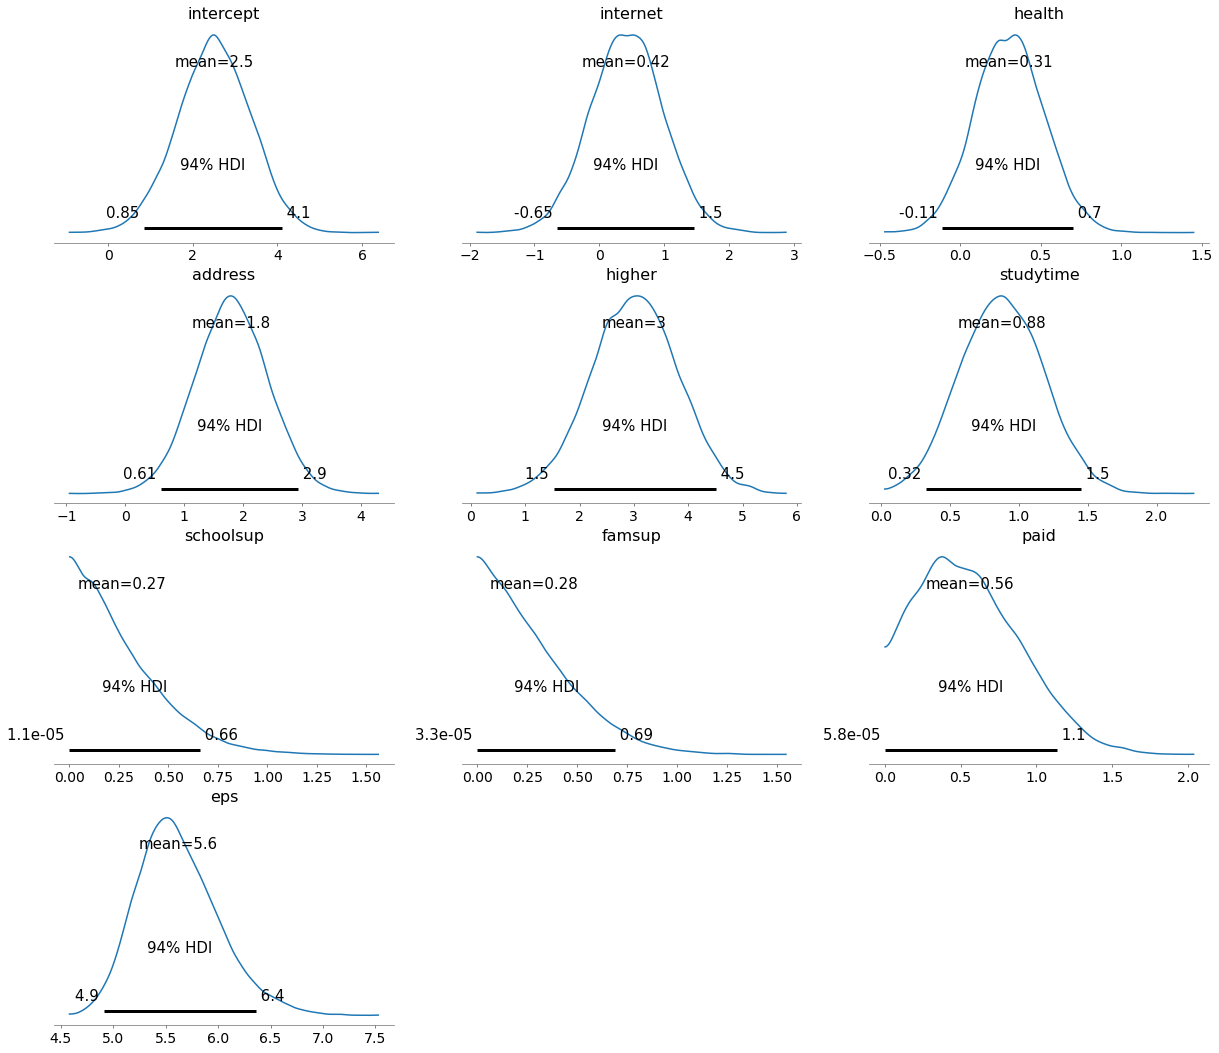

In [39]:
pm.plot_posterior(trace)

array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'internet'}>,
        <AxesSubplot:title={'center':'internet'}>],
       [<AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'address'}>],
       [<AxesSubplot:title={'center':'higher'}>,
        <AxesSubplot:title={'center':'higher'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'schoolsup'}>],
       [<AxesSubplot:title={'center':'famsup'}>,
        <AxesSubplot:title={'center':'famsup'}>],
       [<AxesSubplot:title={'center':'paid'}>,
        <AxesSubplot:title={'center':'paid'}>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'eps'}

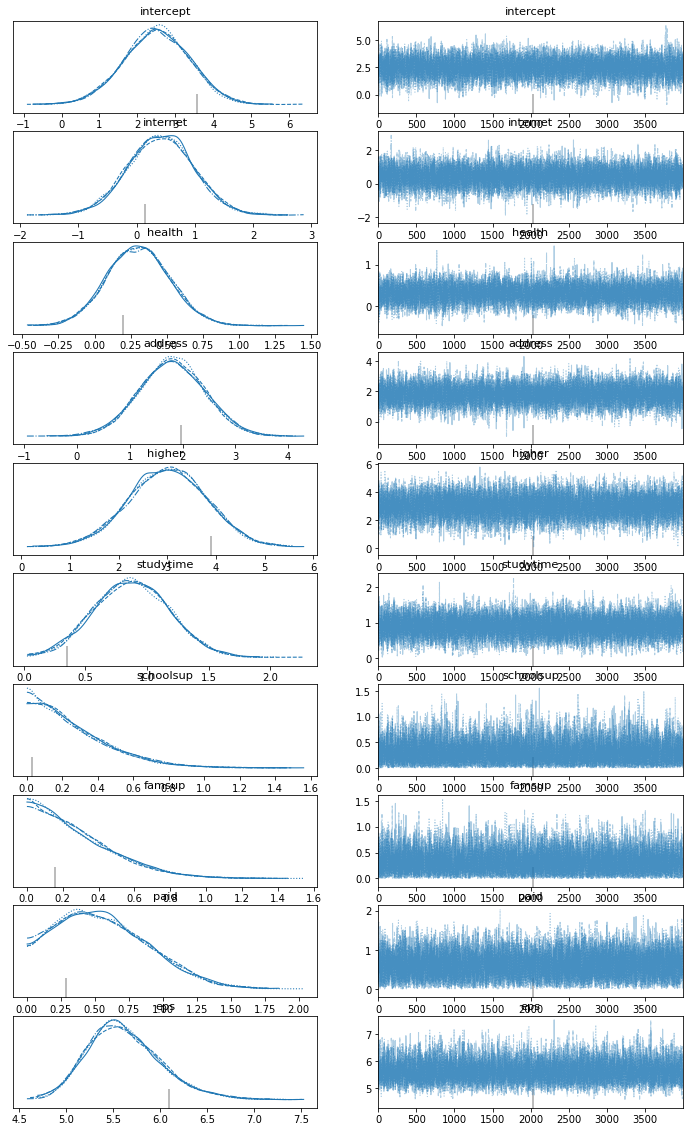

In [40]:
pm.plot_trace(trace)

In [41]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,2.507,0.865,0.850,4.105,0.008,0.006,10640.0,9743.0,1.0
internet,0.416,0.563,-0.646,1.455,0.005,0.004,15151.0,9927.0,1.0
health,0.306,0.216,-0.110,0.700,0.002,0.001,11847.0,9009.0,1.0
address,1.799,0.619,0.614,2.936,0.005,0.004,14340.0,9814.0,1.0
higher,3.010,0.794,1.528,4.509,0.007,0.005,12057.0,9679.0,1.0
studytime,0.876,0.302,0.324,1.455,0.003,0.002,11751.0,6325.0,1.0
schoolsup,0.266,0.219,0.000,0.661,0.002,0.001,9559.0,5452.0,1.0
famsup,0.282,0.224,0.000,0.691,0.002,0.001,9657.0,5548.0,1.0
paid,0.562,0.337,0.000,1.134,0.003,0.002,8834.0,4733.0,1.0
eps,5.619,0.390,4.909,6.360,0.004,0.003,12053.0,10111.0,1.0


<ipython-input-42-76052ecadcc0>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace)


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

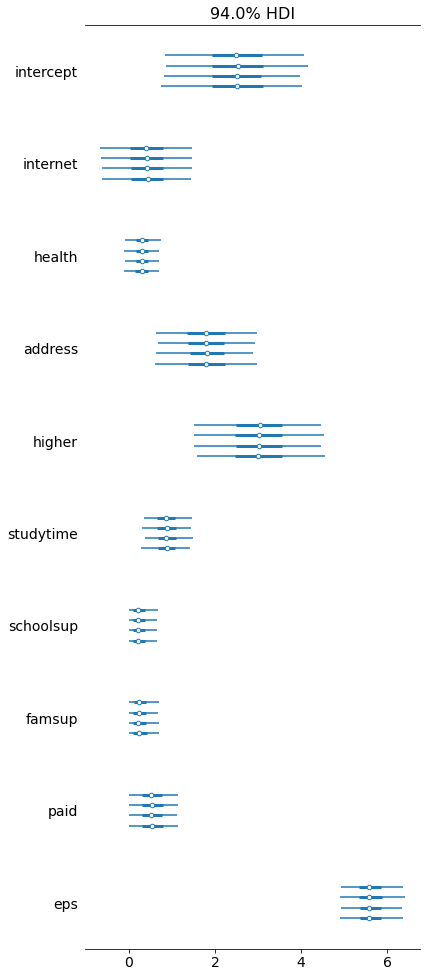

In [42]:
pm.forestplot(trace)

<h2> Posterior predictive checks </h2>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


<AxesSubplot:xlabel='Y / Y'>

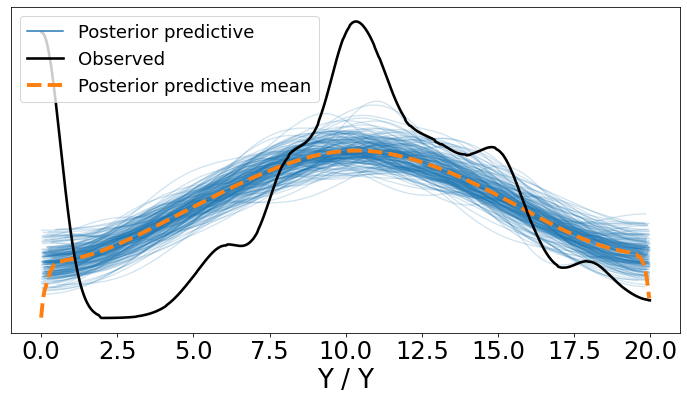

In [43]:
with performance_model:
    y_pred = pm.sample_posterior_predictive(trace, 200, performance_model)

az.plot_ppc(az.from_pymc3(posterior_predictive = y_pred, \
                          model = performance_model), figsize = (12, 6))

<h2> Conclusions and Recommendations </h2>